In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


landmarks_path = "data/labels/landmarks.xlsx"

# Setting display options
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

## Import data from Excel file into DataFrame

In [2]:
# Initialize dictionary to store DataFrames
dfs = {}

# Load the Excel file
xlsx = pd.ExcelFile(landmarks_path)

# Loop through each sheet in the Excel file
for sheet_name in xlsx.sheet_names:

    # Read each sheet into a DataFrame
    df_load = pd.read_excel(xlsx, sheet_name=sheet_name, header=[0, 1], index_col=0)

    # Store the DataFrame in the dictionary with the sheet name as the key
    dfs[sheet_name] = df_load
    
# Concatenate all the DataFrames stored in the dictionary
df = pd.concat(dfs, axis=1)

# Drop all indices that contain any NaN values
df = df.dropna()

# Drop the "Extra" column
df = df.drop(columns=["Extra"], level=1)

df

FKC                                           \
Image                        Amy                  Ben               Marta   
                               X      Y      Z      X      Y      Z     X   
lleg_001_20100125b.nii.gz  149.0   97.0  412.0  150.0   95.0  417.0   148   
lleg_003_20100305b.nii.gz  146.0  113.0  496.0  146.0  114.0  495.0   145   
lleg_004_20100315a.nii.gz  148.0  107.0  524.0  148.0  112.0  518.0   148   
lleg_006_20100409b.nii.gz  126.0   90.0  392.0  127.0   92.0  389.0   128   
lleg_007_20100423.nii.gz   165.0   79.0  431.0  162.0   76.0  433.0   162   
...                          ...    ...    ...    ...    ...    ...   ...   
rleg_126_20100701.nii.gz   103.0  114.0  550.0  102.0  116.0  548.0   103   
rleg_128_20100707a.nii.gz  165.0  166.0  601.0  165.0  169.0  593.0   161   
rleg_129_20100707.nii.gz   121.0  112.0  512.0  122.0  113.0  509.0   121   
rleg_130_20100731a.nii.gz   88.0  173.0  590.0   82.0  177.0  581.0    83   
rleg_133_20100824b.nii.gz  138.0  137.0  589.0  138.0  139.0  583.0   136   

                                                                FME         \
Image                                    Katie                  Amy          
                               Y      Z      X      Y      Z      X      Y   
lleg_001_20100125b.nii.gz   97.0  414.0  148.0   98.0  415.0  188.0   92.0   
lleg_003_20100305b.nii.gz  119.0  490.0  147.0  114.0  495.0  185.0  117.0   
lleg_004_20100315a.nii.gz  114.0  515.0  149.0  110.0  521.0  185.0  113.0   
lleg_006_20100409b.nii.gz   96.0  386.0  127.0   92.0  388.0  163.0   87.0   
lleg_007_20100423.nii.gz    77.0  434.0  163.0   77.0  432.0  200.0   81.0   
...                          ...    ...    ...    ...    ...    ...    ...   
rleg_126_20100701.nii.gz   116.0  549.0  103.0  117.0  546.0  145.0  125.0   
rleg_128_20100707a.nii.gz  166.0  602.0  164.0  166.0  601.0  211.0  170.0   
rleg_129_20100707.nii.gz   112.0  513.0  125.0  109.0  514.0  161.0  119.0   
rleg_130_20100731a.nii.gz  175.0  587.0   84.0  175.0  586.0  122.0  196.0   
rleg_133_20100824b.nii.gz  137.0  588.0  138.0  139.0  588.0  183.0  144.0   

                                                                           \
Image                               Ben               Marta                 
                               Z      X      Y      Z     X      Y      Z   
lleg_001_20100125b.nii.gz  431.0  184.0  102.0  426.0   186   92.0  416.0   
lleg_003_20100305b.nii.gz  506.0  183.0  122.0  504.0   184  115.0  503.0   
lleg_004_20100315a.nii.gz  528.0  183.0  114.0  535.0   185  109.0  516.0   
lleg_006_20100409b.nii.gz  386.0  161.0   93.0  389.0   162   89.0  387.0   
lleg_007_20100423.nii.gz   439.0  197.0   86.0  447.0   200   77.0  447.0   
...                          ...    ...    ...    ...   ...    ...    ...   
rleg_126_20100701.nii.gz   562.0  146.0  116.0  559.0   146  121.0  557.0   
rleg_128_20100707a.nii.gz  610.0  211.0  173.0  604.0   210  169.0  603.0   
rleg_129_20100707.nii.gz   522.0  162.0  119.0  511.0   161  120.0  520.0   
rleg_130_20100731a.nii.gz  601.0  125.0  189.0  594.0   124  190.0  594.0   
rleg_133_20100824b.nii.gz  603.0  182.0  135.0  602.0   181  141.0  601.0   

                                                  FLE                       \
Image                      Katie                  Amy                  Ben   
                               X      Y      Z      X      Y      Z      X   
lleg_001_20100125b.nii.gz  187.0   95.0  424.0  112.0   96.0  423.0  113.0   
lleg_003_20100305b.nii.gz  184.0  118.0  499.0  104.0  115.0  498.0  108.0   
lleg_004_20100315a.nii.gz  183.0  115.0  528.0  108.0  110.0  531.0  108.0   
lleg_006_20100409b.nii.gz  162.0   91.0  395.0   92.0   98.0  386.0   92.0   
lleg_007_20100423.nii.gz   200.0   79.0  437.0  124.0   75.0  439.0  123.0   
...                          ...    ...    ...    ...    ...    ...    ...   
rleg_126_20100701.nii.gz   143.0  121.0  549.0   63.0  109.0  557.0   63.0  

## Calculate the D

In [3]:
# Initialize a list to store the results
result_values = []

# Iterate through each landmark 
for landmark in df.columns.get_level_values(0).unique():
    # Calculate the mean across all observers for each coordinate
    avg_df = df[landmark].apply(pd.to_numeric).T.groupby(level=1).mean().T
    
    for observer in df.columns.get_level_values(1).unique():
        # Subtract mean values from each observer's original values and square the differences
        observer_df = df[landmark][observer].apply(pd.to_numeric)
        subtracted_df = observer_df.sub(avg_df).pow(2)
        
        # Sum the squared differences for 'X', 'Y', and 'Z', and then take the square root
        sqrt_summed_squares = np.sqrt(subtracted_df.sum(axis=1))
        
        # Create a DataFrame for the final result
        result_df = pd.DataFrame(sqrt_summed_squares, columns=pd.MultiIndex.from_tuples([(landmark, observer)]))
        result_values.append(result_df)

# Concatenate all the result DataFrames along columns
final_result_df = pd.concat(result_values, axis=1)

final_result_df

FKC                                     FME  \
                                Amy       Ben     Marta     Katie       Amy   
lleg_001_20100125b.nii.gz  2.524876  3.297726  0.935414  1.541104  7.693341   
lleg_003_20100305b.nii.gz  2.828427  1.414214  5.744563  1.732051  3.316625   
lleg_004_20100315a.nii.gz  5.863020  1.968502  5.556528  1.837117  1.620185   
lleg_006_20100409b.nii.gz  4.220486  0.559017  4.562072  0.901388  4.534589   
lleg_007_20100423.nii.gz   3.051639  1.677051  1.820027  0.559017  3.588175   
...                             ...       ...       ...       ...       ...   
rleg_126_20100701.nii.gz   2.487469  0.829156  0.829156  2.586020  6.754628   
rleg_128_20100707a.nii.gz  2.277608  6.759253  3.960745  1.920286  2.861381   
rleg_129_20100707.nii.gz   1.346291  3.363406  1.677051  4.220486  5.049752   
rleg_130_20100731a.nii.gz  5.836309  5.836309  1.600781  0.250000  6.647368   
rleg_133_20100824b.nii.gz  2.291288  4.153312  2.061553  1.500000  4.015595   

                                                               FLE             \
                                Ben      Marta     Katie       Amy        Ben   
lleg_001_20100125b.nii.gz  7.327175   8.870597  0.829156  0.433013   5.117372   
lleg_003_20100305b.nii.gz  4.242641   3.000000  4.000000  2.091650   6.393356   
lleg_004_20100315a.nii.gz  8.403868  11.429129  2.761340  5.640257   2.512469   
lleg_006_20100409b.nii.gz  3.172144   2.462214  5.836309  1.369306   1.968502   
lleg_007_20100423.nii.gz   7.271520   5.905506  5.820223  0.935414   0.935414   
...                             ...        ...       ...       ...        ...   
rleg_126_20100701.nii.gz   5.350234   1.060660  8.007809  1.658312   3.570714   
rleg_128_20100707a.nii.gz  3.960745   4.763140  5.068284  0.935414   1.837117   
rleg_129_20100707.nii.gz   6.041523   3.082207  2.121320  0.612372   5.733672   
rleg_130_20100731a.nii.gz  4.548351   3.269174  5.356071  8.173891  23.115201   
rleg_133_20100824b.nii.gz  5.841661   0.790569  3.824265  4.107919   4.677072   

                                                    FTP                      \
                              Marta     Katie       Amy       Ben     Marta   
lleg_001_20100125b.nii.gz  3.112475  2.487469  5.984355  1.346291  1.145644   
lleg_003_20100305b.nii.gz  3.588175  2.524876  6.619101  5.640257  4.723611   
lleg_004_20100315a.nii.gz  5.505679  3.051639  7.607562  1.695582  0.935414   
lleg_006_20100409b.nii.gz  2.806243  1.695582  4.815340  5.629165  0.829156   
lleg_007_20100423.nii.gz   1.541104  2.091650  5.000000  2.449490  1.000000   
...                             ...       ...       ...       ...       ...   
rleg_126_20100701.nii.gz   1.658312  2.958040  3.716517  2.704163  2.304886   
rleg_128_20100707a.nii.gz  0.612372  1.968502  4.015595  7.818248  8.810505   
rleg_129_20100707.nii.gz   3.984344  2.318405  8.881160  8.852966  5.326819   
rleg_130_20100731a.nii.gz  8.173891  9.685685  4.703722  3.409545  1.060660   
rleg_133_20100824b.nii.gz  1.968502  1.369306  7.862093  0.559017  4.100305   

                                          TKC                                 \
                              Katie       Amy        Ben     Marta     Katie   
lleg_001_20100125b.nii.gz  4.100305  7.382412  10.173495  4.527693  5.787918   
lleg_003_20100305b.nii.gz  5.640257  6.179604   7.562242  5.804093  4.815340   
lleg_004_20100315a.nii.gz  5.556528  7.802243   8.147085  5.279678  4.623311   
lleg_006_20100409b.nii.gz  0.829156  7.254309   8.192985  4.257347  4.198214   
lleg_007_20100423.nii.gz   3.741657  2.474874   3.482097  3.622844  3.482097   
...                             ...       ...        ...       ...       ...   
rleg_126_20100701.nii.gz   3.363406  7.356969   8.895223  9.253378  6.680195   
rleg_128_20100707a.nii.gz  3.824265  6.892024   7.713624  8.154753  4.949747   
rleg_129_20100707.nii.gz   5.373546  5.722762   6.689544  7.123903  6.689544   
rleg_130_20100731a.nii.gz  2.936835  5.361

### Average D per image

In [4]:
# Initialize lists to store the average and standard deviation DataFrames per landmark
average_per_landmark = []
stddev_per_landmark = []

# Iterate through each landmark in level 0 of final_result_df
for landmark in final_result_df.columns.get_level_values(0).unique():
    # Select all columns for the current landmark
    landmark_df = final_result_df[landmark]
    
    # Calculate the mean across all observers for the current landmark
    avg_landmark = landmark_df.mean(axis=1)
    
    # Calculate the standard deviation across all observers for the current landmark
    std_landmark = landmark_df.std(axis=1)
    
    # Create DataFrames for the averaged values and standard deviations
    avg_landmark_df = pd.DataFrame(avg_landmark, columns=[(landmark, 'Mean')])
    std_landmark_df = pd.DataFrame(std_landmark, columns=[(landmark, 'StdDev')])
    
    # Append the DataFrames to the respective lists
    average_per_landmark.append(avg_landmark_df)
    stddev_per_landmark.append(std_landmark_df)

# Concatenate all the averaged and stddev DataFrames along columns while maintaining the order
final_average_df = pd.concat([pd.concat([avg_df, std_df], axis=1) for avg_df, std_df in zip(average_per_landmark, stddev_per_landmark)], axis=1)

# Create a MultiIndex for the columns
final_average_df.columns = pd.MultiIndex.from_tuples(final_average_df.columns)

final_average_df

FKC                 FME                  FLE  \
                               Mean    StdDev      Mean    StdDev       Mean   
lleg_001_20100125b.nii.gz  2.074780  1.045809  6.180068  3.627536   2.787582   
lleg_003_20100305b.nii.gz  2.929814  1.971866  3.639816  0.579352   3.649514   
lleg_004_20100315a.nii.gz  3.806292  2.202164  6.053631  4.651674   4.177511   
lleg_006_20100409b.nii.gz  2.560741  2.122925  4.001314  1.495319   1.959908   
lleg_007_20100423.nii.gz   1.776934  1.019808  5.646356  1.524757   1.375896   
...                             ...       ...       ...       ...        ...   
rleg_126_20100701.nii.gz   1.682950  0.986697  5.293333  3.023382   2.461345   
rleg_128_20100707a.nii.gz  3.729473  2.207119  4.163387  0.985702   1.338352   
rleg_129_20100707.nii.gz   2.651808  1.368898  4.073701  1.790703   3.162198   
rleg_130_20100731a.nii.gz  3.380850  2.888450  4.955241  1.418020  12.287167   
rleg_133_20100824b.nii.gz  2.501538  1.150250  3.618022  2.092818   3.030700   

                                          FTP                 TKC            \
                             StdDev      Mean    StdDev      Mean    StdDev   
lleg_001_20100125b.nii.gz  1.929382  3.144149  2.324315  6.967879  2.435476   
lleg_003_20100305b.nii.gz  1.934268  5.655807  0.774039  6.090320  1.137545   
lleg_004_20100315a.nii.gz  1.627228  3.948772  3.169059  6.463079  1.771480   
lleg_006_20100409b.nii.gz  0.615098  3.025704  2.558023  5.975714  2.054539   
lleg_007_20100423.nii.gz   0.556071  3.047787  1.716972  3.265478  0.531229   
...                             ...       ...       ...       ...       ...   
rleg_126_20100701.nii.gz   0.960404  3.022243  0.636182  8.046441  1.227345   
rleg_128_20100707a.nii.gz  0.667148  6.117153  2.570457  6.927537  1.418556   
rleg_129_20100707.nii.gz   2.198636  7.108623  2.030594  6.556438  0.592303   
rleg_130_20100731a.nii.gz  7.253783  3.027691  1.509123  6.186729  0.795306   
rleg_133_20100824b.nii.gz  1.608253  4.155430  2.982148  6.465389  1.328528   

                               FMCP                 FLCP                 TMCP  \
                               Mean    StdDev       Mean     StdDev      Mean   
lleg_001_20100125b.nii.gz  3.656922  0.579564   4.340848   0.677776  6.836637   
lleg_003_20100305b.nii.gz  2.788164  1.770552   3.732148   1.262837  4.614453   
lleg_004_20100315a.nii.gz  3.893193  2.835617   6.359231   2.957518  5.411733   
lleg_006_20100409b.nii.gz  3.043755  1.575036   3.311603   1.696383  3.290541   
lleg_007_20100423.nii.gz   3.071699  1.472942   3.949998   1.986626  3.773059   
...                             ...       ...        ...        ...       ...   
rleg_126_20100701.nii.gz   2.191670  1.584964   2.054919   0.787239  6.609377   
rleg_128_20100707a.nii.gz  2.343042  1.006746   2.282612   1.141450  3.344413   
rleg_129_20100707.nii.gz   2.355968  0.314993  20.003815  13.208452  6.188604   
rleg_130_20100731a.nii.gz  3.361491  0.428765  10.000031   6.589070  5.173003   
rleg_133_20100824b.nii.gz  2.767282  0.198836   2.909332   1.515821  8.790581   

                                          TLCP                 FHC            \
                             StdDev       Mean    StdDev      Mean    StdDev   
lleg_001_20100125b.nii.gz  3.743508   7.589793  3.919190  1.950212  0.919547   
lleg_003_20100305b.nii.gz  2.107706  10.155789  6.805386  1.591622  0.675021   
lleg_004_20100315a.nii.gz  2.523395   5.842553  1.975543  1.233929  0.369537   
lleg_006_20100409b.nii.gz  1.216466   4.659516  0.467488  1.476017  0.715424   
lleg_007_20100423.nii.gz   3.125492   3.143628  1.655337  2.481249  1.060442   
...                             ...        ...       ...       ...       ...   
rleg_126_20100701.nii.gz   2.122462   4.845268  2.698364  0.707107  0.000000   
rleg_128_20100707a.nii.gz  1.708764   5.723434  2.497947  2.306391  0.860666   
rleg_129_20100707.nii.gz   2.277037   5.952274  2.143343  1.439579  0.905620   
rleg_130_20100731a.nii.gz  2.

### Average D per observer

In [5]:
# Initialize lists to store the mean and standard deviation DataFrames per observer for each landmark
average_per_observer = []
stddev_per_observer = []

# Iterate through each landmark in the order they appear in final_result_df
for landmark in final_result_df.columns.get_level_values(0).unique():
    # Select all columns for the current landmark
    landmark_df = final_result_df[landmark]
    
    # Calculate the mean across all images for each observer
    avg_observer = landmark_df.mean().to_frame(name=(landmark, 'Mean'))
    
    # Calculate the standard deviation across all images for each observer
    std_observer = landmark_df.std().to_frame(name=(landmark, 'StdDev'))
    
    # Append the DataFrames to the respective lists
    average_per_observer.append(avg_observer)
    stddev_per_observer.append(std_observer)

# Concatenate all the mean and stddev DataFrames along columns while maintaining the order
final_average_observer_df = pd.concat([pd.concat([avg_df, std_df], axis=1) for avg_df, std_df in zip(average_per_observer, stddev_per_observer)], axis=1)

# Create a MultiIndex for the columns
final_average_observer_df.columns = pd.MultiIndex.from_tuples(final_average_observer_df.columns)
final_average_observer_df

FKC                 FME                 FLE                 FTP  \
           Mean    StdDev      Mean    StdDev      Mean    StdDev      Mean   
Amy    2.446435  1.438706  3.957783  2.070562  2.979991  1.979049  4.328578   
Ben    3.175889  1.728649  4.950137  2.361765  5.317048  5.280415  4.679430   
Marta  2.473021  1.412246  3.506641  2.025297  3.008540  2.015810  2.942769   
Katie  2.916932  2.543397  3.348004  1.900739  3.686889  2.834905  3.132258   

                      TKC                FMCP                FLCP            \
         StdDev      Mean    StdDev      Mean    StdDev      Mean    StdDev   
Amy    2.460123  5.815988  1.416099  2.413388  2.545497  3.219928  4.786759   
Ben    2.154682  7.257000  2.023983  2.308155  1.236096  3.257865  2.014084   
Marta  2.499651  5.802718  2.088571  2.967575  2.055356  2.563413  2.039958   
Katie  2.123186  5.694313  1.494899  2.759473  1.495950  3.312195  2.529217   

           TMCP                TLCP                 FHC                 FIP  \
           Mean    StdDev      Mean    StdDev      Mean    StdDev      Mean   
Amy    4.629276  2.450864  6.604872  2.994093  1.348531  0.641928  3.055270   
Ben    6.026555  3.359115  7.094693  2.389738  1.984495  0.926371  3.844501   
Marta  5.206749  2.619337  6.225249  2.441870  1.409024  0.626915  2.927285   
Katie  4.427146  2.153992  4.440985  2.420829  1.455497  0.692949  2.215664   

                      TAC                FMDU                 FMDL             \
         StdDev      Mean    StdDev      Mean    StdDev       Mean     StdDev   
Amy    1.820952  2.088585  1.180023  8.253756  5.806801   7.839138   6.320129   
Ben    1.962219  2.658699  1.574055  4.710525  3.407709   7.038585  11.577080   
Marta  1.525304  2.125177  0.927571  6.156962  4.492188   7.828889   7.515488   
Katie  1.325169  1.732573  0.854855  9.896748  7.687362  10.267799   8.095092   

           TMDU                TMDL            
           Mean    StdDev      Mean    StdDev  
Amy    7.857736  5.774119  7.289948  6.071749  
Ben    5.536585  7.394528  4.981127  7.504310  
Marta  6.131923  4.384357  5.817284  4.387382  
Katie  9.388825  7.282399  7.284265  5.643290

## Average D per landmark

In [6]:
# Calculate the mean for each landmark over all images
landmark_average_df = final_average_df.mean()

# Convert the resulting Series into a DataFrame and transpose it
landmark_average_df = landmark_average_df.to_frame(name="Stat").T


landmark_average_df

FKC                 FME                 FLE                 FTP  \
         Mean    StdDev      Mean    StdDev      Mean    StdDev      Mean   
Stat  2.75307  1.415866  3.940641  1.828656  3.748117  1.893908  3.770759   

                     TKC                FMCP               FLCP            \
        StdDev      Mean    StdDev      Mean    StdDev     Mean    StdDev   
Stat  1.995053  6.142505  1.590015  2.612148  1.201942  3.08835  1.445871   

          TMCP               TLCP                 FHC                FIP  \
          Mean    StdDev     Mean    StdDev      Mean    StdDev     Mean   
Stat  5.072432  2.248366  6.09145  2.232989  1.549387  0.625535  3.01068   

                     TAC                FMDU                FMDL            \
        StdDev      Mean    StdDev      Mean    StdDev      Mean    StdDev   
Stat  1.402449  2.151258  1.004975  7.254498  4.648819  8.243603  5.286078   

          TMDU                TMDL            
          Mean    StdDev      Mean    StdDev  
Stat  7.228767  4.344417  6.343156  3.784528

In [7]:
# Calculate the mean for each landmark over all images
landmark_average_df = final_average_observer_df.mean()

# Convert the resulting Series into a DataFrame and transpose it
landmark_average_df = landmark_average_df.to_frame(name="Stat").T

landmark_average_df

FKC                 FME                 FLE                 FTP  \
         Mean    StdDev      Mean    StdDev      Mean    StdDev      Mean   
Stat  2.75307  1.780749  3.940641  2.089591  3.748117  3.027545  3.770759   

                     TKC                FMCP               FLCP            \
        StdDev      Mean    StdDev      Mean    StdDev     Mean    StdDev   
Stat  2.309411  6.142505  1.755888  2.612148  1.833225  3.08835  2.842505   

          TMCP               TLCP                 FHC                FIP  \
          Mean    StdDev     Mean    StdDev      Mean    StdDev     Mean   
Stat  5.072432  2.645827  6.09145  2.561632  1.549387  0.722041  3.01068   

                     TAC                FMDU                FMDL            \
        StdDev      Mean    StdDev      Mean    StdDev      Mean    StdDev   
Stat  1.658411  2.151258  1.134126  7.254498  5.348515  8.243603  8.376947   

          TMDU                TMDL            
          Mean    StdDev      Mean    StdDev  
Stat  7.228767  6.208851  6.343156  5.901683

## Plot

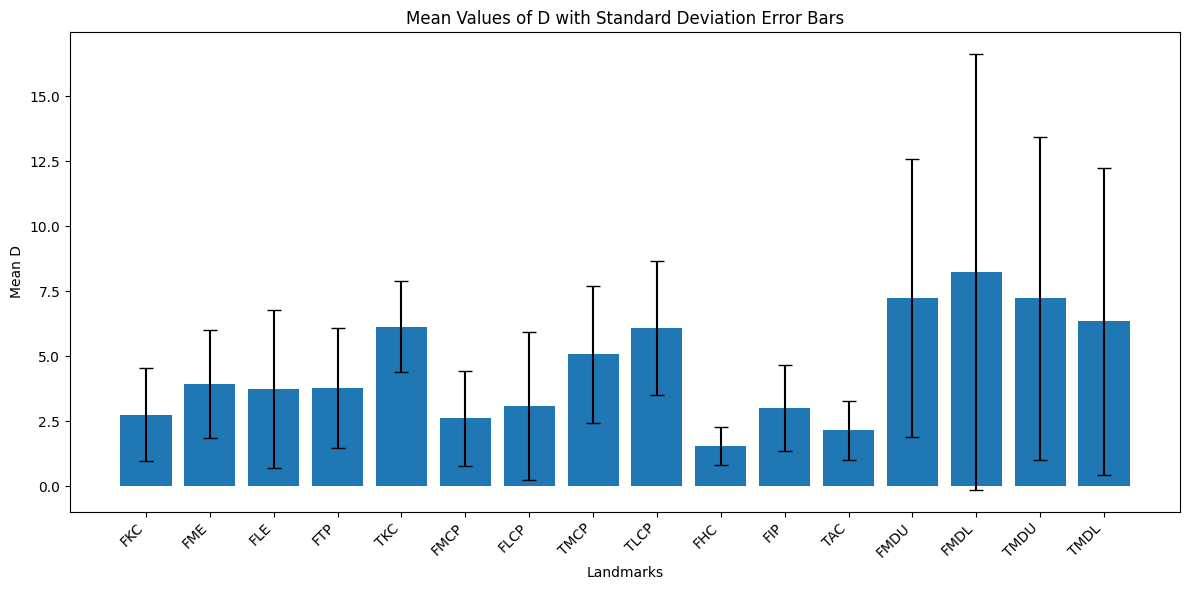

In [8]:

# Extract the mean and standard deviation for each landmark
means = landmark_average_df.xs('Mean', level=1, axis=1)
stddevs = landmark_average_df.xs('StdDev', level=1, axis=1)

# Extract the landmark names from the columns MultiIndex
landmark_names = means.columns

# Plot the bar graph with error bars
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Bars with Error Bars
ax.bar(landmark_names, means.values.flatten(), yerr=stddevs.values.flatten(), capsize=5)

# Set labels and title
ax.set_xlabel('Landmarks')
ax.set_ylabel('Mean D')
ax.set_title('Mean Values of D with Standard Deviation Error Bars')
ax.set_xticks(range(len(landmark_names)))
ax.set_xticklabels(landmark_names, rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()